In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('loan-prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Problem Statement:-

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

1.Loan_ID

2.Gender

3.Married

4.Dependents

5.Education

6.Self_Employed

7.ApplicantIncome

8.CoapplicantIncome

9.Loan_Amount

10.Loan_Amount_Term

11.Credit History

12.Property_Area

13.Dependent Variable (Target Variable):

14.Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
df.groupby('Gender')['Married'].value_counts()

Gender  Married
Female  No          80
        Yes         31
Male    Yes        357
        No         130
Name: Married, dtype: int64

In [9]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [10]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [11]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [14]:
df[df['Credit_History'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [15]:
mode_of_credit=df.pivot_table(values='Credit_History',columns='Loan_Status',aggfunc=(lambda x:x.mode()))

In [16]:
mode_of_credit

Loan_Status,N,Y
Credit_History,1.0,1.0


# Observation:- Clearly the mode for Y and N is 1 so we can impute the missing value with 1.

In [17]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [18]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [19]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EDA

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [22]:
df.drop('Loan_ID',axis=1,inplace=True)

# Univariate Analysis

In [23]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

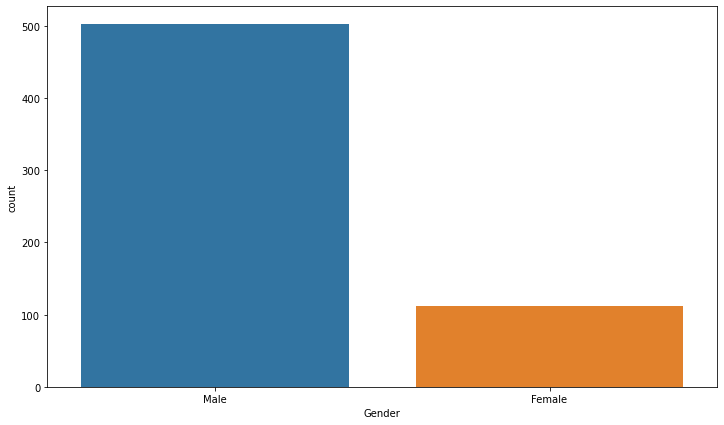

In [24]:
plt.figure(figsize=(12,7))
sns.countplot('Gender',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

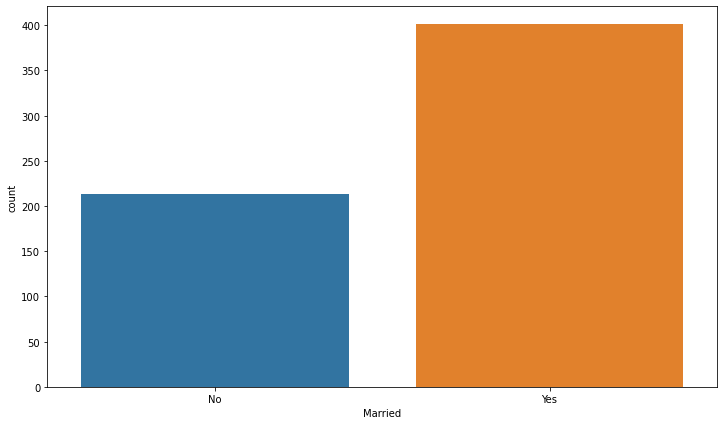

In [25]:
plt.figure(figsize=(12,7))
sns.countplot('Married',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

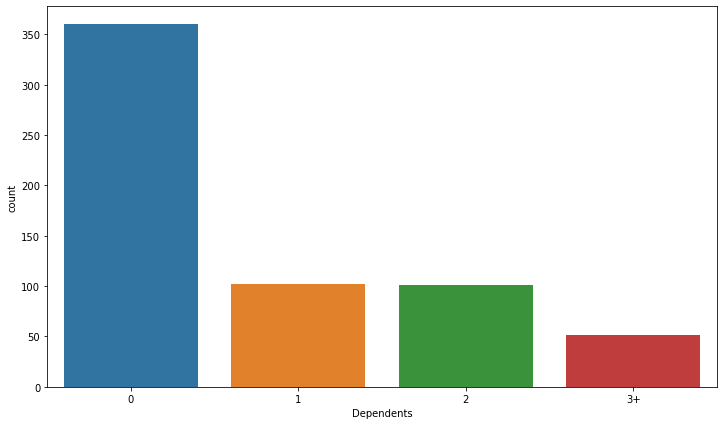

In [26]:
plt.figure(figsize=(12,7))
sns.countplot('Dependents',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

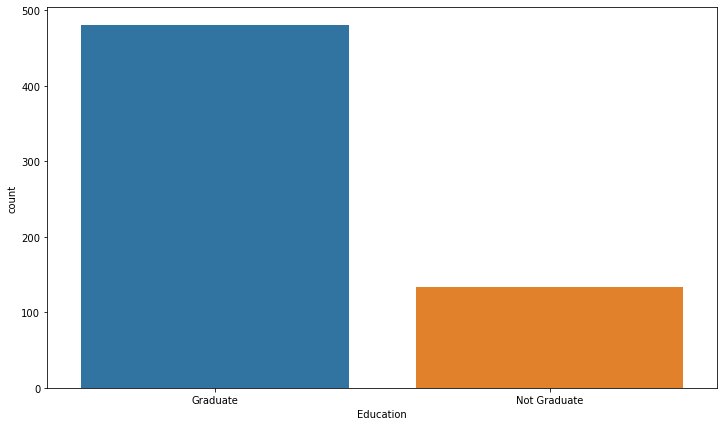

In [27]:
plt.figure(figsize=(12,7))
sns.countplot('Education',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

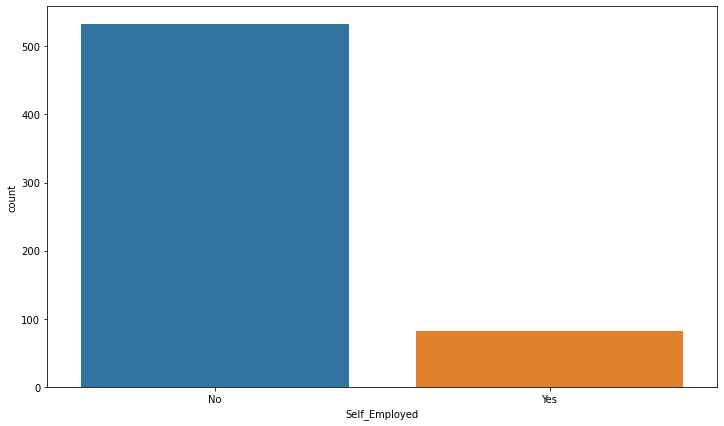

In [28]:
plt.figure(figsize=(12,7))
sns.countplot('Self_Employed',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

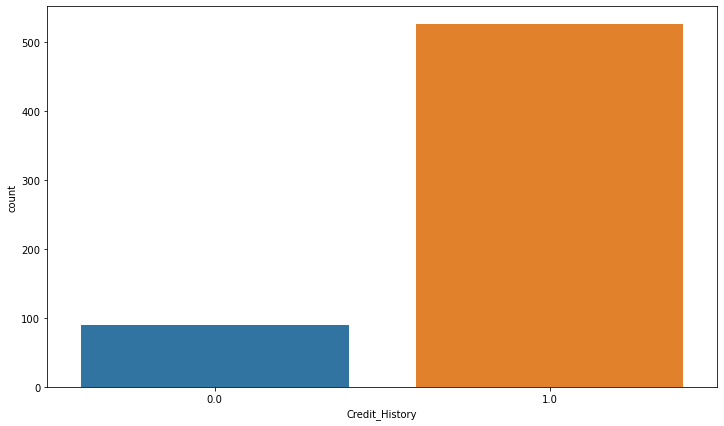

In [29]:
plt.figure(figsize=(12,7))
sns.countplot('Credit_History',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

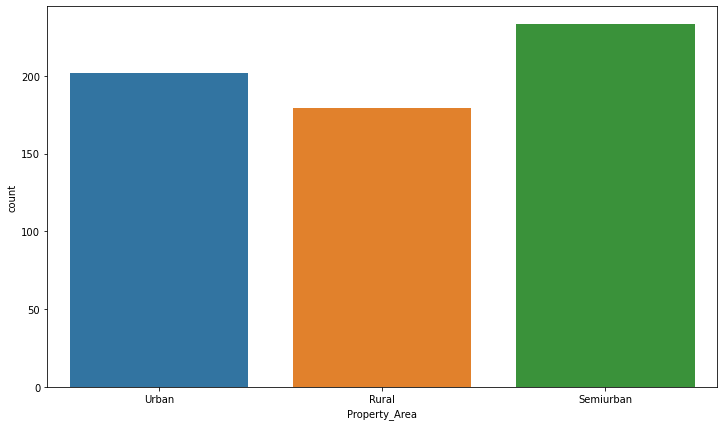

In [30]:
plt.figure(figsize=(12,7))
sns.countplot('Property_Area',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

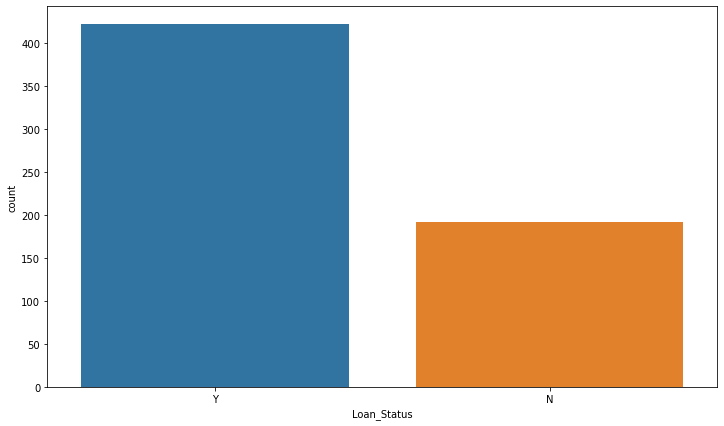

In [31]:
plt.figure(figsize=(12,7))
sns.countplot('Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

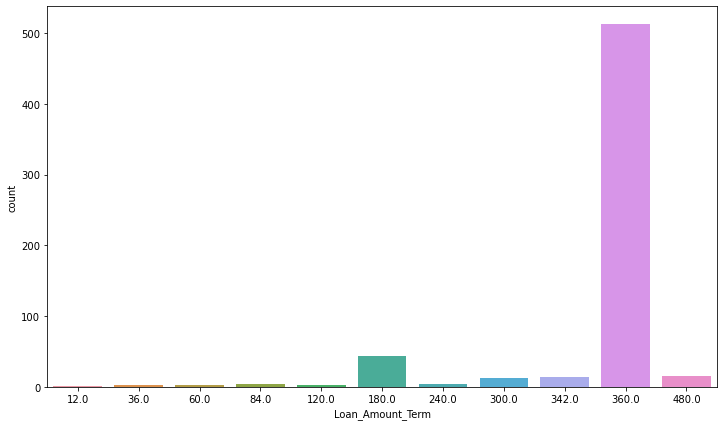

In [32]:
plt.figure(figsize=(12,7))
sns.countplot('Loan_Amount_Term',data=df)

# Observation:-

1.The loan term of 360 has highest value.

2.SemiUrban property has highest value.

3.Male applicants has highest value.

4.dependents has highest value.

5.Credit_history with value 1 has highest value.

In [33]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [34]:
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})

# Bivariate analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='Gender'>

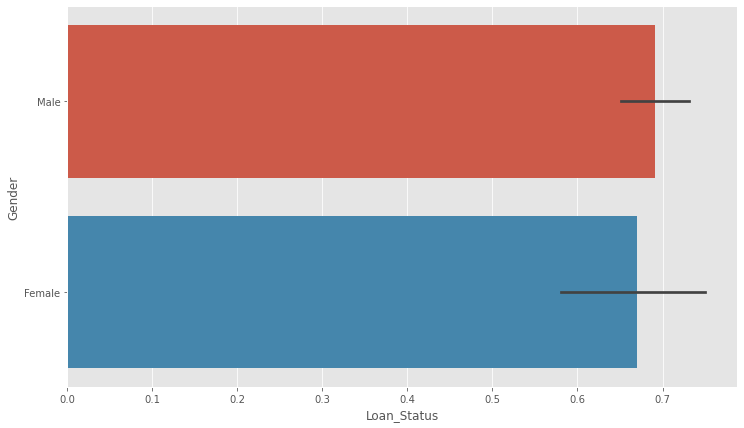

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.barplot(x='Loan_Status',y='Gender',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Married'>

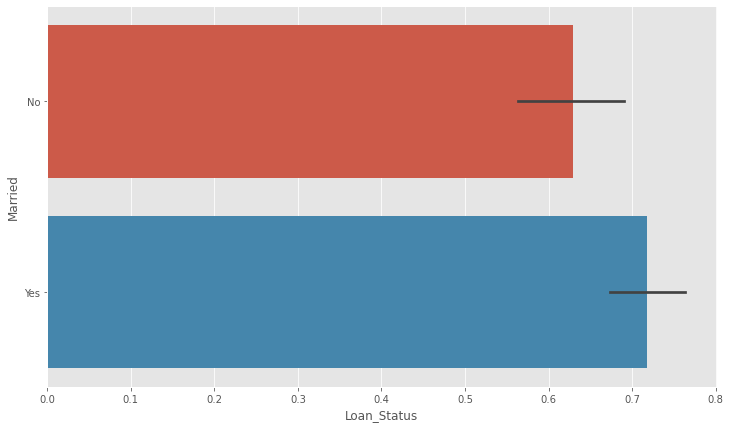

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(x='Loan_Status',y='Married',data=df)


<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

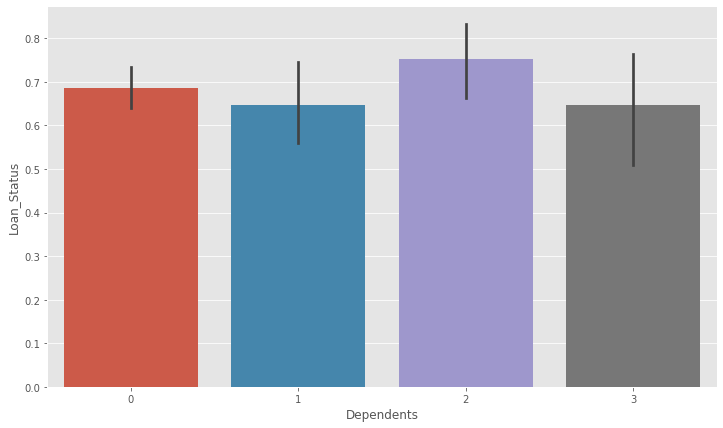

In [37]:
plt.figure(figsize=(12,7))
sns.barplot(x='Dependents',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

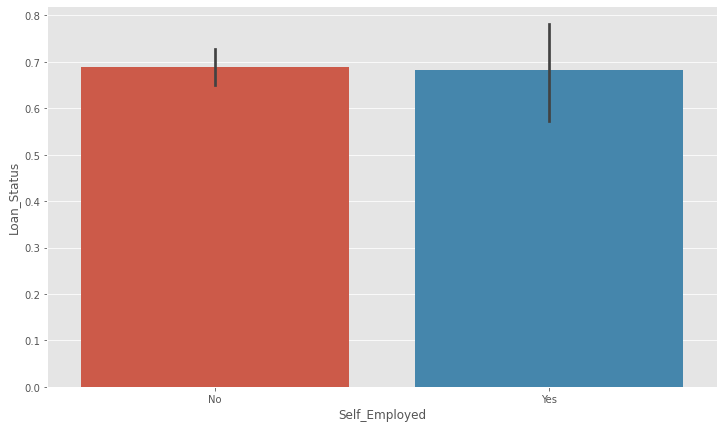

In [38]:
plt.figure(figsize=(12,7))
sns.barplot(x='Self_Employed',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

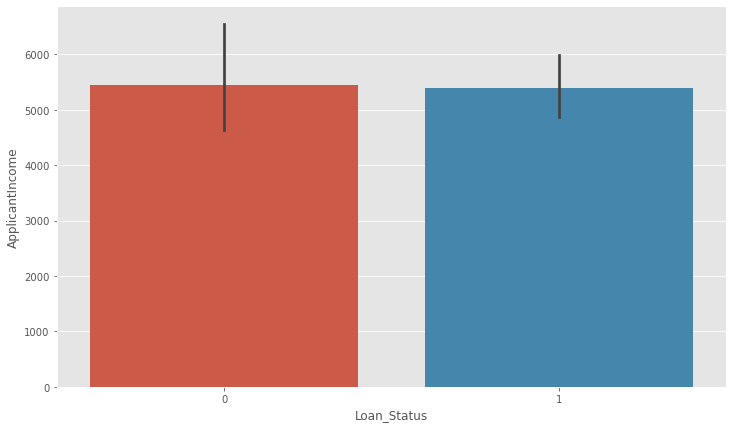

In [39]:
plt.figure(figsize=(12,7))
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

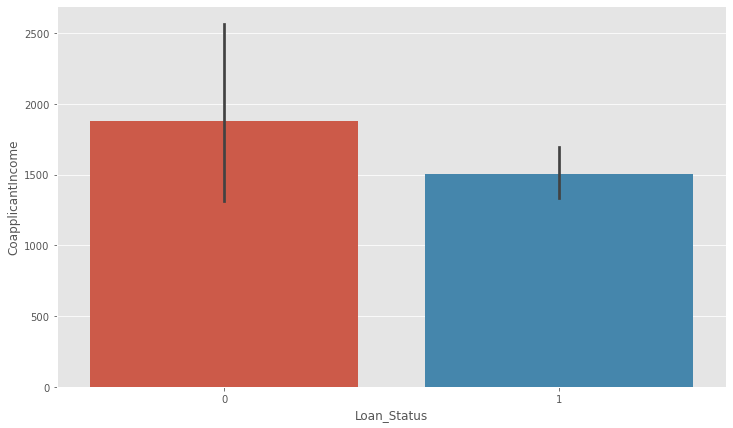

In [40]:
plt.figure(figsize=(12,7))
sns.barplot(x='Loan_Status',y='CoapplicantIncome',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

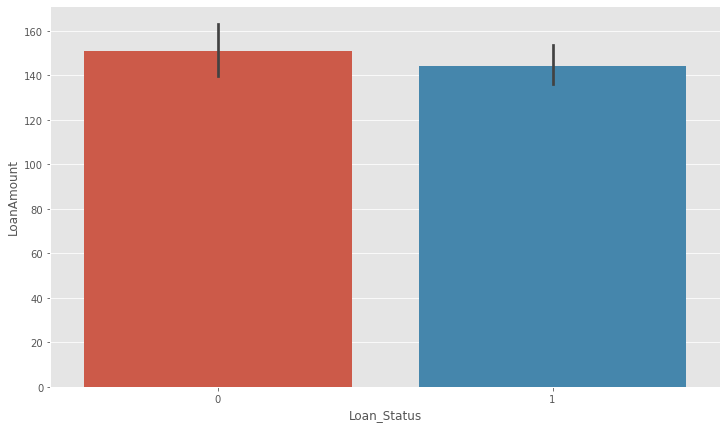

In [41]:
plt.figure(figsize=(12,7))
sns.barplot(x='Loan_Status',y='LoanAmount',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

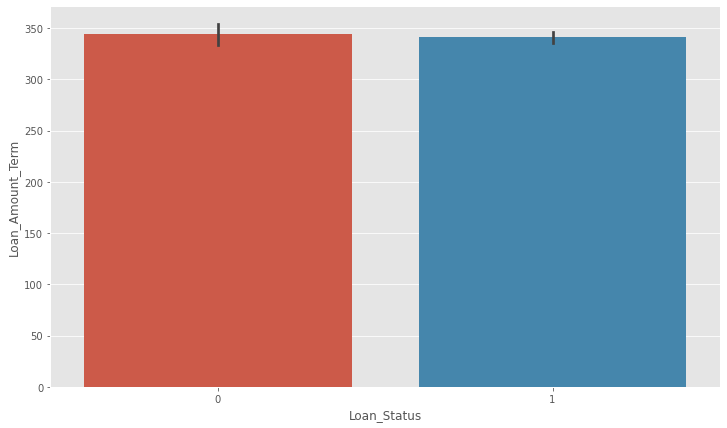

In [42]:
plt.figure(figsize=(12,7))
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

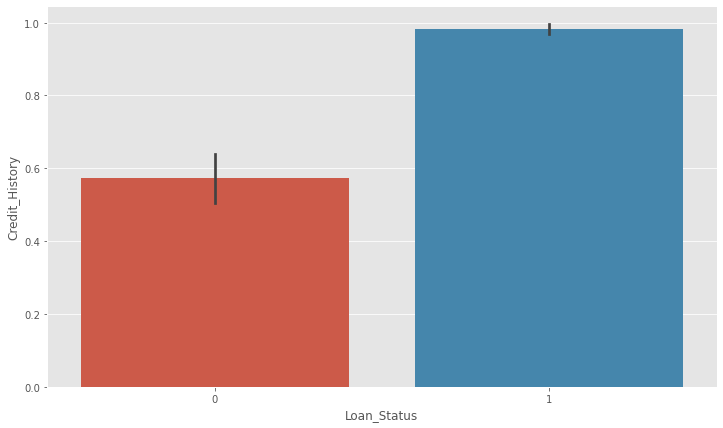

In [43]:
plt.figure(figsize=(12,7))
sns.barplot(x='Loan_Status',y='Credit_History',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

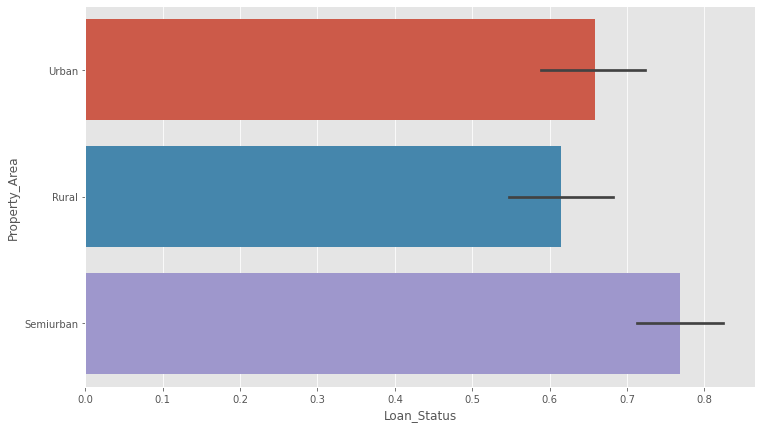

In [44]:
plt.figure(figsize=(12,7))
sns.barplot(x='Loan_Status',y='Property_Area',data=df)

# Observation:-


1.Male loan_status of getting approved is more.

2.Married people Loan Status getting approved is more as compared to unmarried.

3.No of dependent having 2 has more application approved.

4.Those who has less loan_amount and with 1 credit score gets loan approved frequently.

5.Semiurban property has high rate of loan approved

In [45]:
## Encoding categorial variable.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
categorial_variable=['Gender','Married','Education','Self_Employed','Property_Area']

In [48]:
df[categorial_variable]=df[categorial_variable].apply(le.fit_transform)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(5), int64(2), object(1)
memory usage: 45.7+ KB


In [50]:
df['Dependents']=df['Dependents'].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB


In [52]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(columns=['CoapplicantIncome','ApplicantIncome'],axis=1,inplace=True)

In [53]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,40.000000,180.0,1.0,0,1,4106.0
611,1,1,1,0,0,253.000000,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,187.000000,360.0,1.0,2,1,7583.0


<Figure size 1080x1080 with 0 Axes>

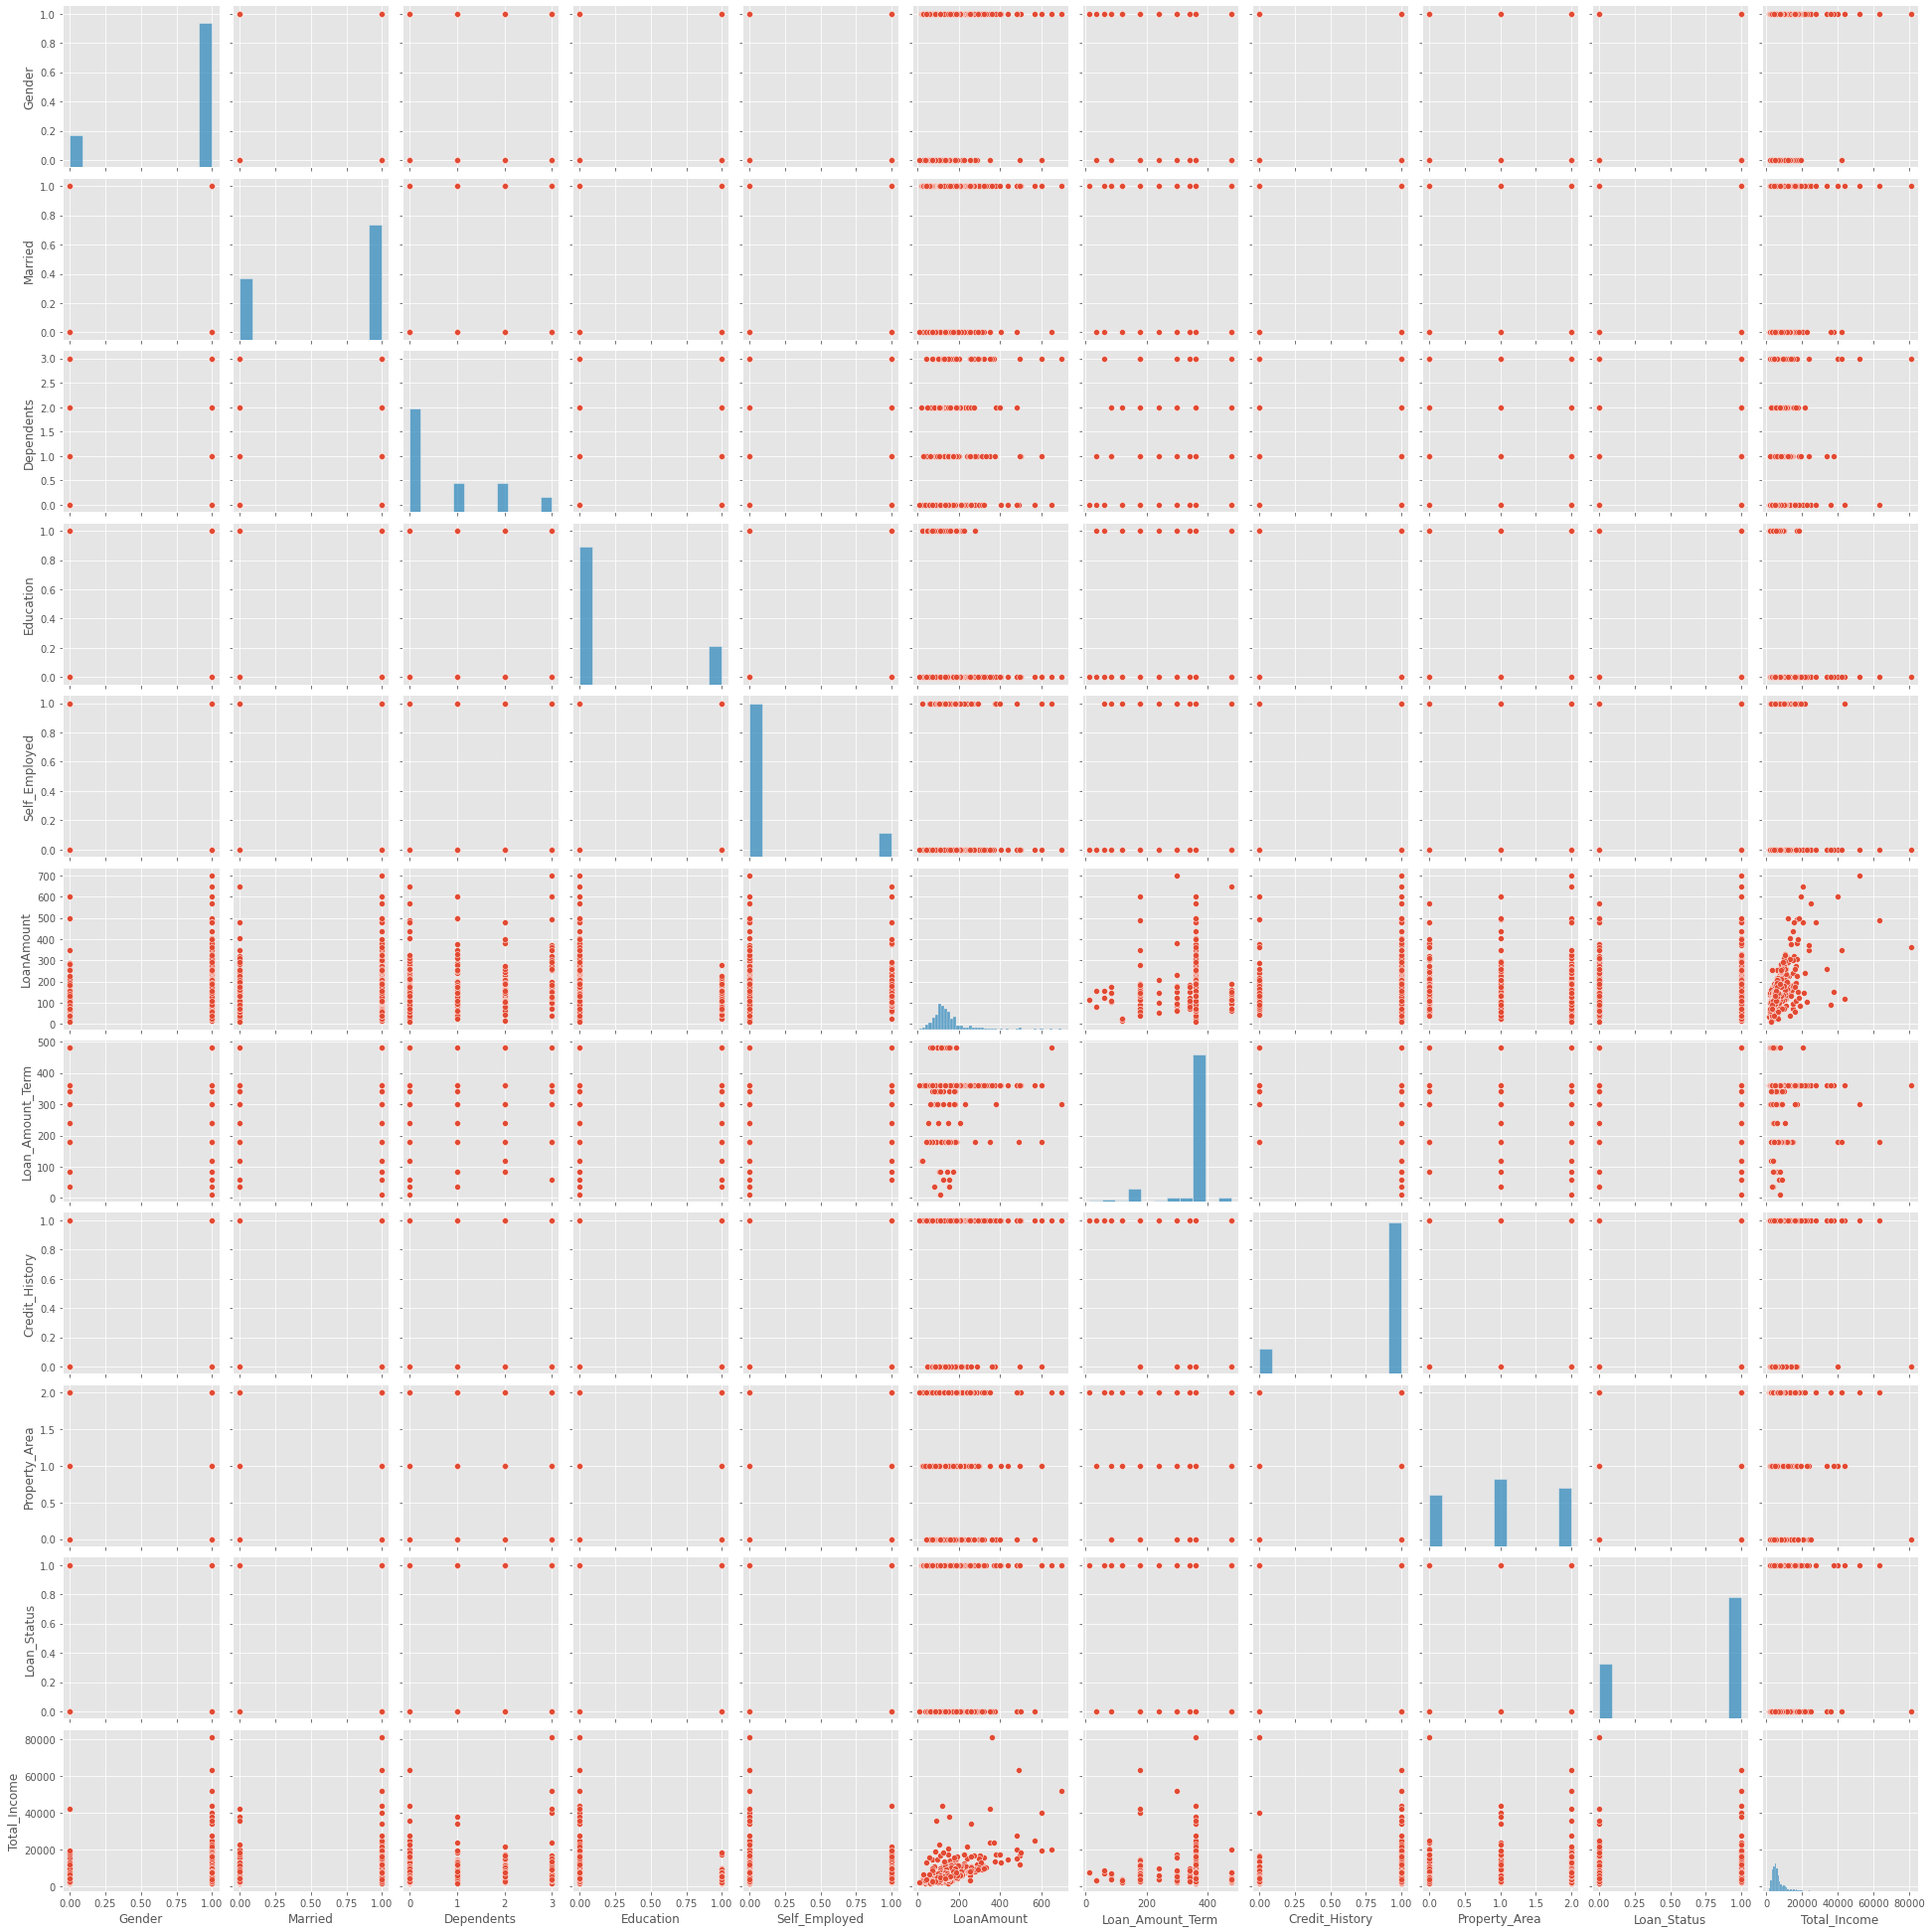

In [54]:
plt.figure(figsize=(15,15))
sns.pairplot(df) 


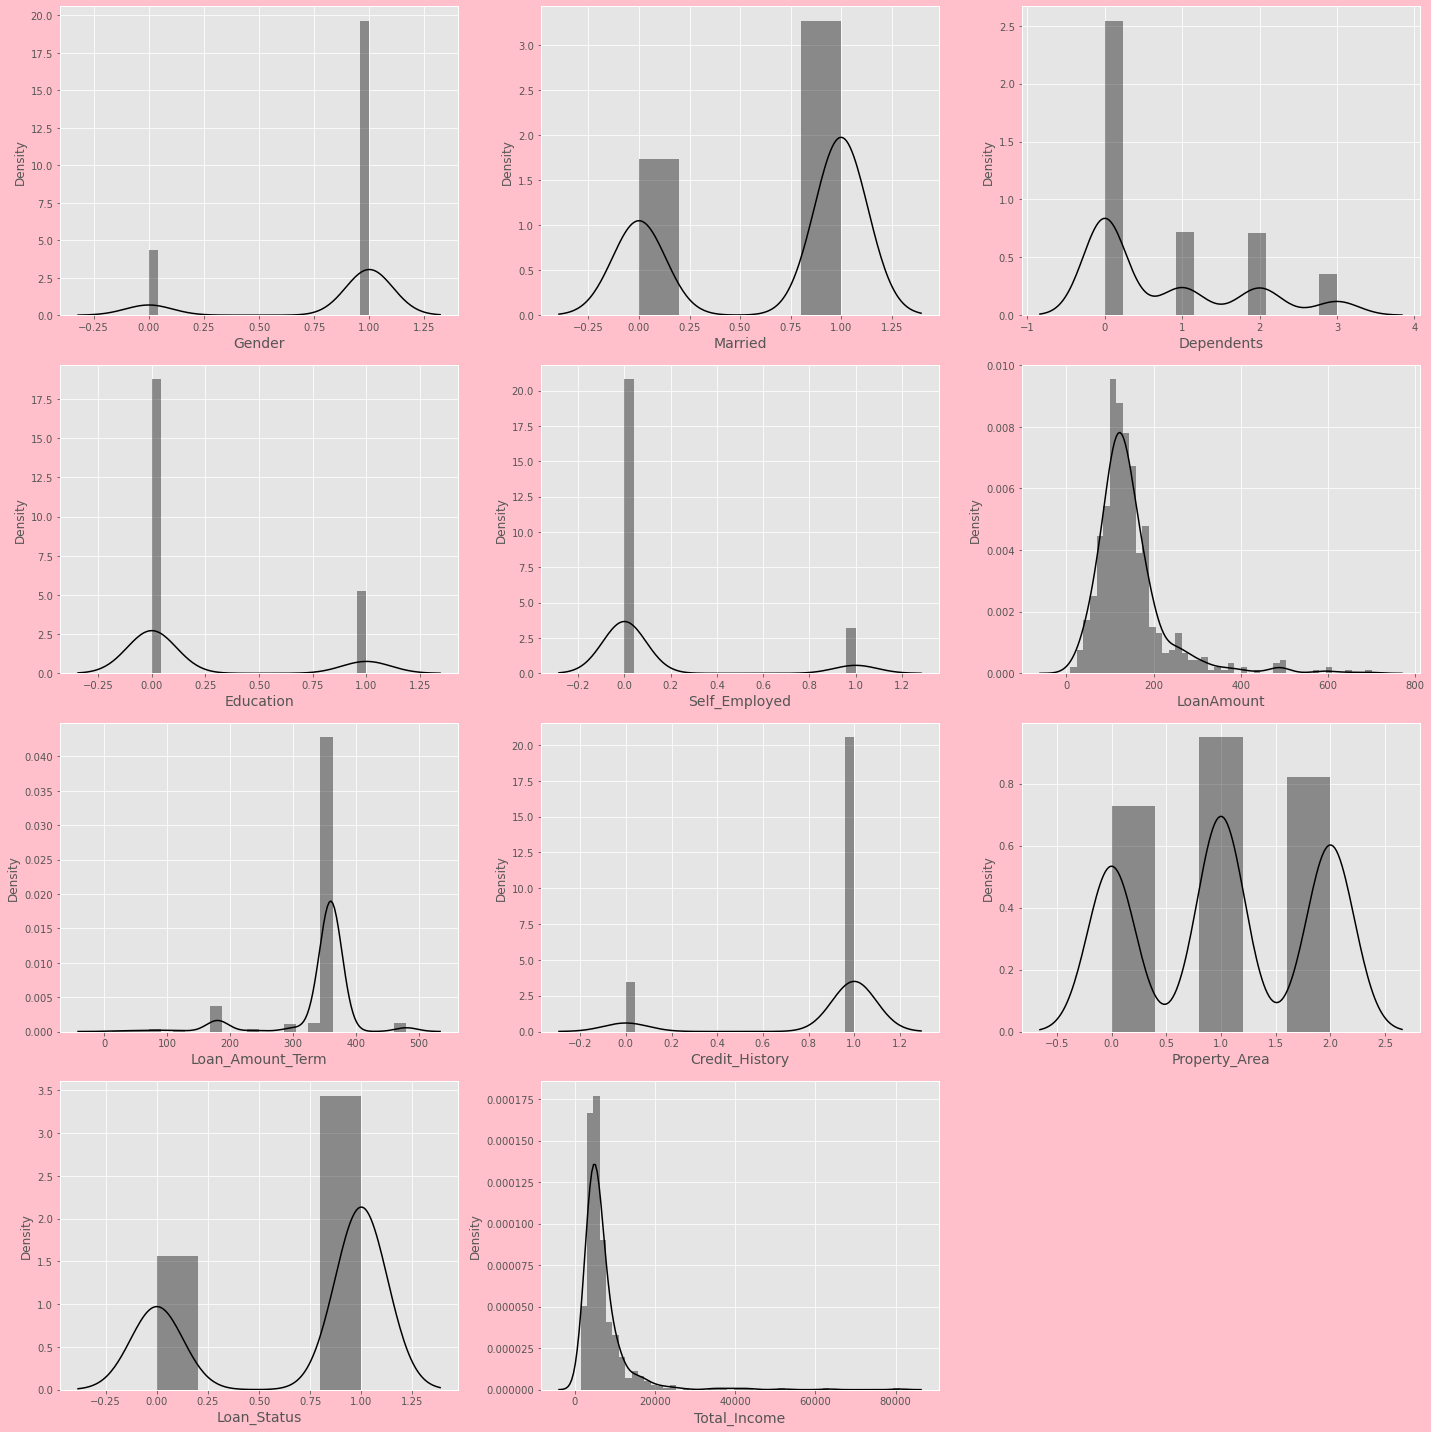

In [55]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1

for column in df:
    if plotnumber <= 12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='k')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

# Observation:- skewness is there in some of the features, we have to treat them moving forward

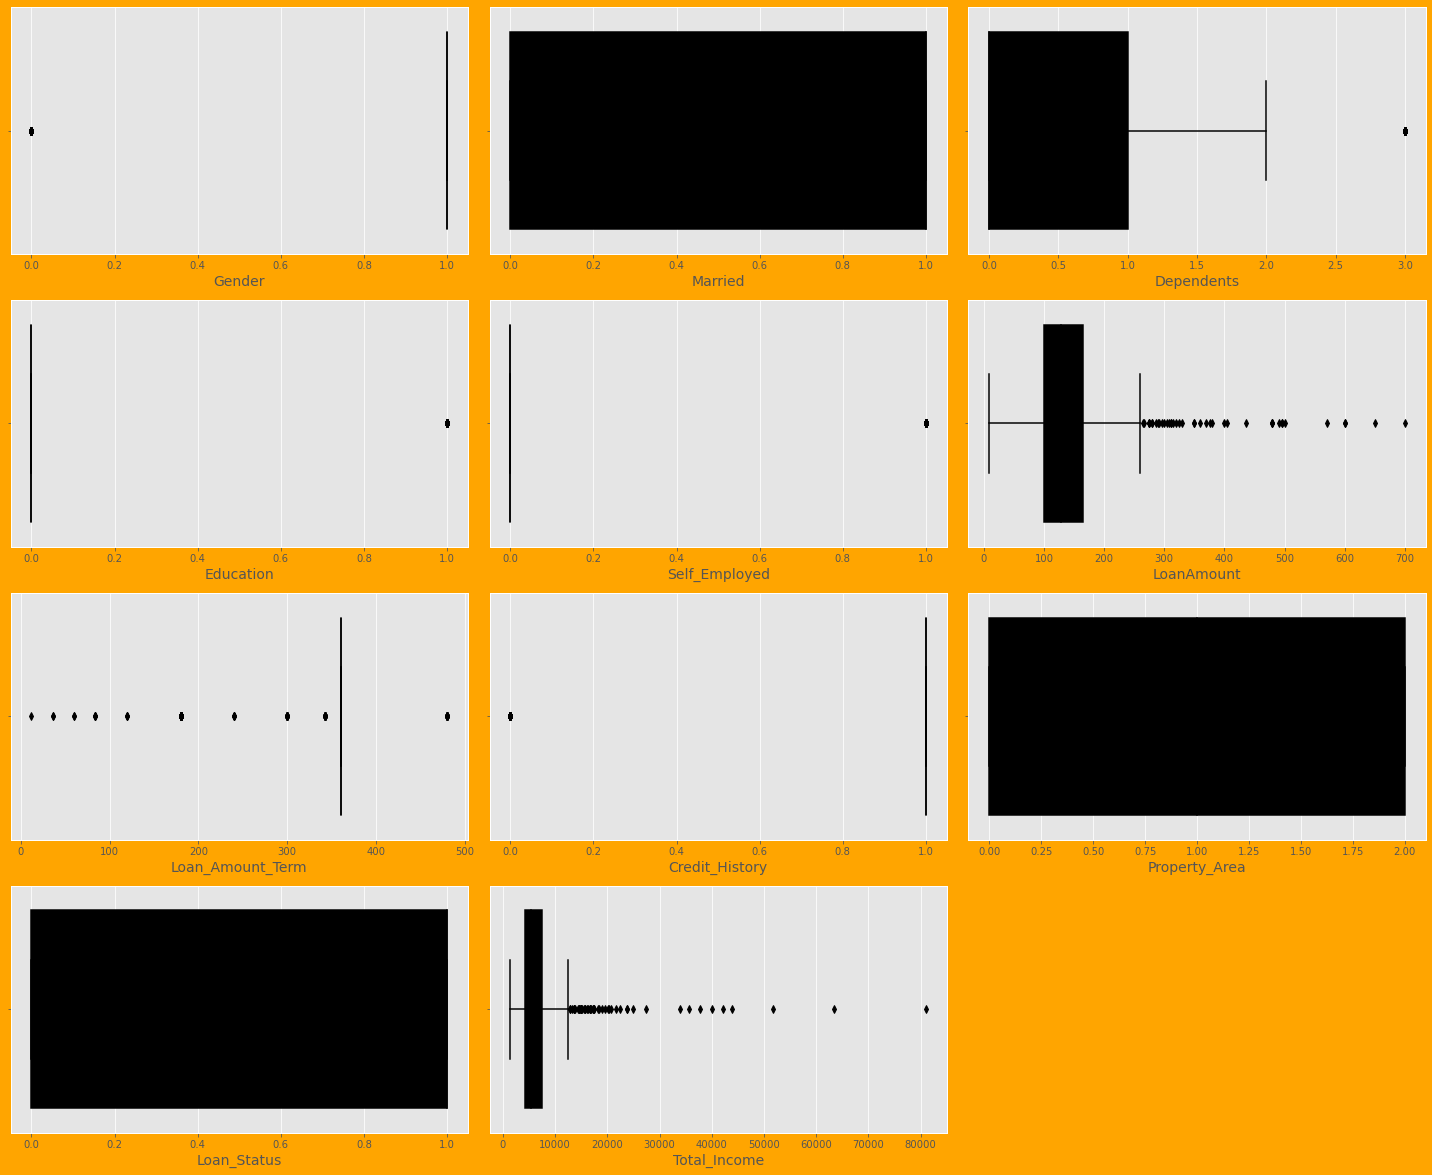

In [56]:
plt.figure(figsize=(20,20),facecolor='orange')

plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color='k')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

In [57]:
## Removing outlier through Zscore

from scipy.stats import zscore
df.shape

(614, 11)

In [58]:
df=df[np.abs(zscore(df)<3).all(axis=1)]

In [59]:
df.shape

(593, 11)

In [60]:
data_loss=614-593
print(data_loss)

21


In [61]:
print((21/614)*100) 


3.420195439739414


# Around 3.4 Percent data lost so we can proceed

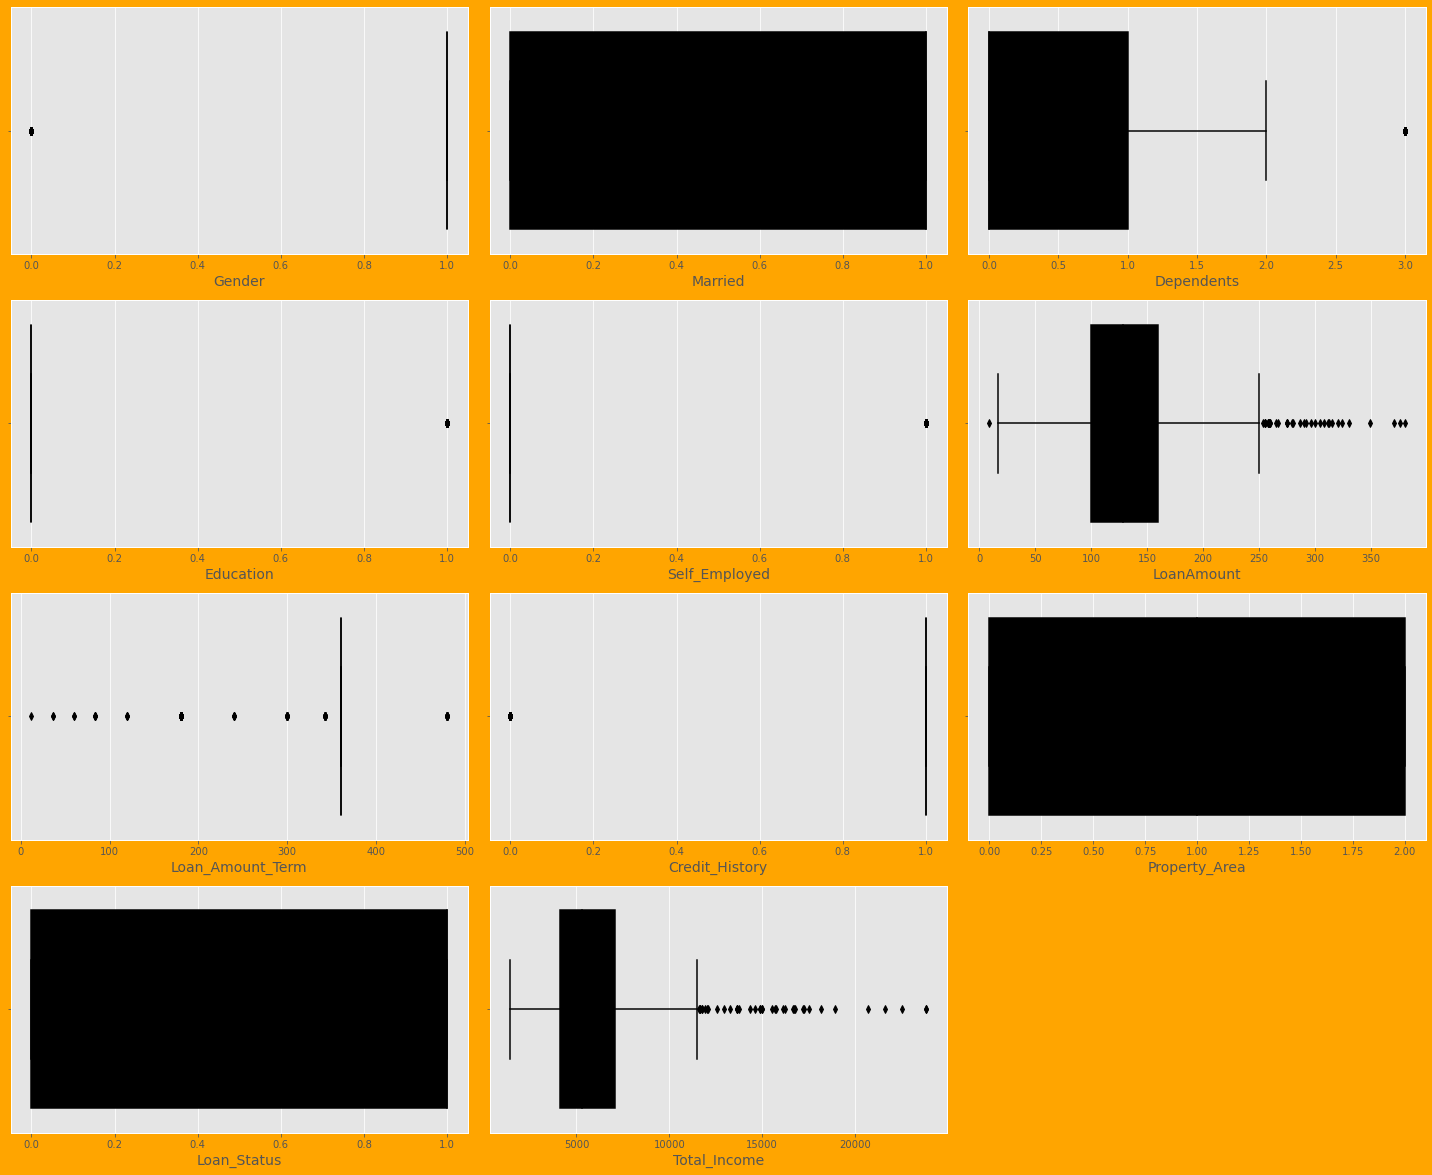

In [62]:
plt.figure(figsize=(20,20),facecolor='orange')

plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color='k')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

In [63]:
# Checking skewness

df.skew()

Gender             -1.636802
Married            -0.634856
Dependents          1.029981
Education           1.313788
Self_Employed       2.207979
LoanAmount          1.152306
Loan_Amount_Term   -2.444945
Credit_History     -2.021295
Property_Area      -0.062701
Loan_Status        -0.822267
Total_Income        2.054852
dtype: float64

In [64]:
# Separating target variable and features
X=df.drop('Loan_Status',axis=1)
y=df.Loan_Status

In [65]:
# Treating Skewness 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [66]:
x=pd.DataFrame(pt.fit_transform(X),columns=X.columns)
x 


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0.474559,-1.365553,-0.818584,-0.540314,-0.386296,0.305121,0.184909,0.411856,1.193325,0.0
1,0.474559,0.732304,0.878442,-0.540314,-0.386296,-0.017782,0.184909,0.411856,-1.346142,0.0
2,0.474559,0.732304,-0.818584,-0.540314,2.588687,-1.388753,0.184909,0.411856,1.193325,0.0
3,0.474559,0.732304,-0.818584,1.850776,-0.386296,-0.167086,0.184909,0.411856,1.193325,0.0
4,0.474559,-1.365553,-0.818584,-0.540314,-0.386296,0.212957,0.184909,0.411856,1.193325,0.0
...,...,...,...,...,...,...,...,...,...,...
588,-2.107218,-1.365553,-0.818584,-0.540314,-0.386296,-1.254064,0.184909,0.411856,-1.346142,0.0
589,0.474559,0.732304,1.528790,-0.540314,-0.386296,-2.216911,-2.328344,0.411856,-1.346142,0.0
590,0.474559,0.732304,0.878442,-0.540314,-0.386296,1.802695,0.184909,0.411856,1.193325,0.0
591,0.474559,0.732304,1.331209,-0.540314,-0.386296,0.936941,0.184909,0.411856,1.193325,0.0


In [67]:
x.skew()

Gender             -1.636802
Married            -0.634856
Dependents          0.458381
Education           1.313788
Self_Employed       2.207979
LoanAmount          0.060144
Loan_Amount_Term    0.404540
Credit_History     -2.021295
Property_Area      -0.157358
Total_Income        0.000000
dtype: float64

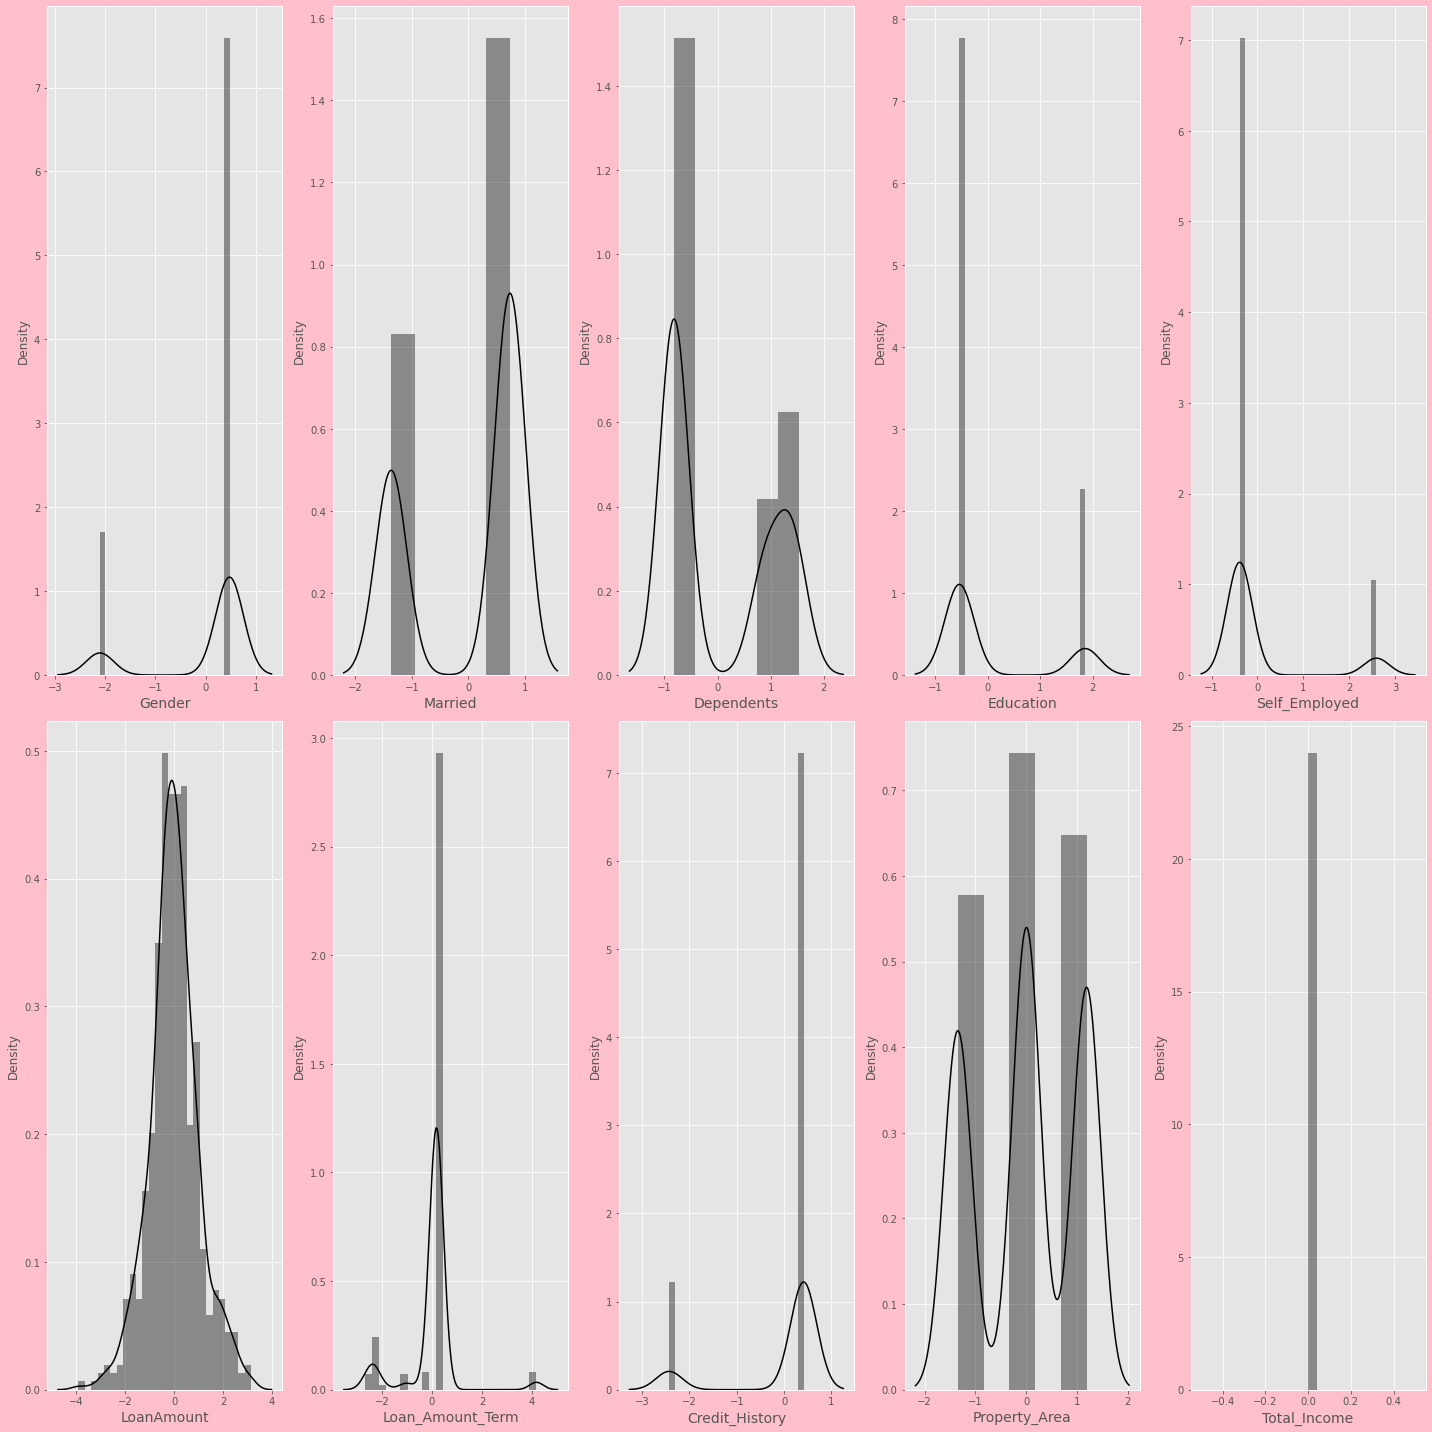

In [68]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1

for column in x:
    if plotnumber <= 10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(x[column],color='k')
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
    
plt.tight_layout()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

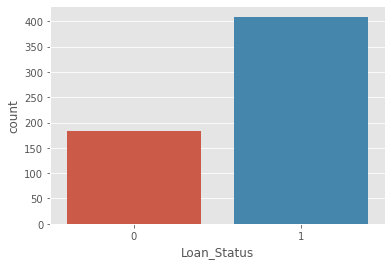

In [70]:
sns.countplot(y)

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [72]:
scaler=StandardScaler()

In [73]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.47455939, -1.36555275, -0.81858399, ...,  0.41185586,
         1.19332465,  0.        ],
       [ 0.47455939,  0.73230419,  0.87844233, ...,  0.41185586,
        -1.34614161,  0.        ],
       [ 0.47455939,  0.73230419, -0.81858399, ...,  0.41185586,
         1.19332465,  0.        ],
       ...,
       [ 0.47455939,  0.73230419,  0.87844233, ...,  0.41185586,
         1.19332465,  0.        ],
       [ 0.47455939,  0.73230419,  1.33120932, ...,  0.41185586,
         1.19332465,  0.        ],
       [-2.10721783, -1.36555275, -0.81858399, ..., -2.42803394,
         0.00683184,  0.        ]])

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.185840,Gender
1,1.317896,Married
2,1.175467,Dependents
3,1.043951,Education
4,1.023852,Self_Employed
5,1.112298,LoanAmount
6,1.039234,Loan_Amount_Term
7,1.007411,Credit_History
8,1.023132,Property_Area
9,NaN,Total_Income


In [76]:
## Since after removing skewness Total income becomes zero so dropping it.

x.drop('Total_Income',axis=1,inplace=True)

In [77]:
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.474559,-1.365553,-0.818584,-0.540314,-0.386296,0.305121,0.184909,0.411856,1.193325
1,0.474559,0.732304,0.878442,-0.540314,-0.386296,-0.017782,0.184909,0.411856,-1.346142
2,0.474559,0.732304,-0.818584,-0.540314,2.588687,-1.388753,0.184909,0.411856,1.193325
3,0.474559,0.732304,-0.818584,1.850776,-0.386296,-0.167086,0.184909,0.411856,1.193325
4,0.474559,-1.365553,-0.818584,-0.540314,-0.386296,0.212957,0.184909,0.411856,1.193325
...,...,...,...,...,...,...,...,...,...
588,-2.107218,-1.365553,-0.818584,-0.540314,-0.386296,-1.254064,0.184909,0.411856,-1.346142
589,0.474559,0.732304,1.528790,-0.540314,-0.386296,-2.216911,-2.328344,0.411856,-1.346142
590,0.474559,0.732304,0.878442,-0.540314,-0.386296,1.802695,0.184909,0.411856,1.193325
591,0.474559,0.732304,1.331209,-0.540314,-0.386296,0.936941,0.184909,0.411856,1.193325


<AxesSubplot:>

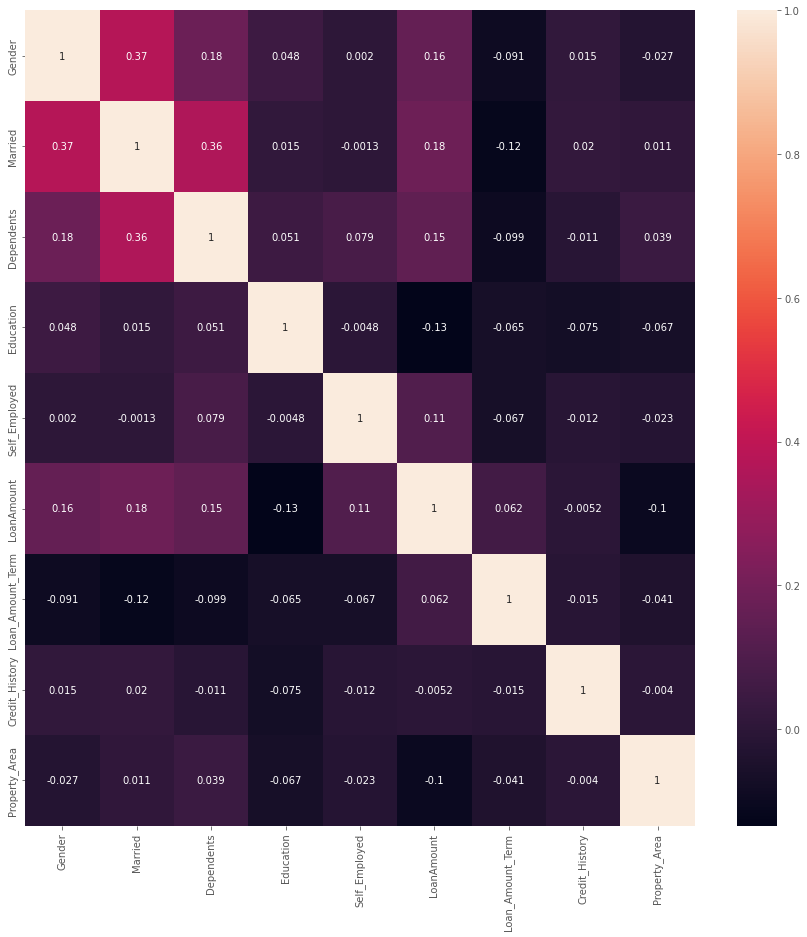

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(),annot=True,annot_kws={'size':10})

In [79]:
## Transforming features into components through PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[ 0.98561292, -0.4448181 , -1.08298833, ...,  0.74724499,
        -0.93803759, -0.        ],
       [-1.03092405, -0.56537332,  0.25353821, ..., -0.88431945,
        -0.16494358, -0.        ],
       [-0.01686653,  0.22236192, -0.81788134, ..., -1.62968448,
         0.87009424,  0.        ],
       ...,
       [-1.57838572, -1.01014153, -1.15084487, ...,  1.16987038,
        -0.0921071 , -0.        ],
       [-1.51057468, -0.46683148, -1.30365582, ...,  0.4955745 ,
        -0.30831083, -0.        ],
       [ 2.01916723, -0.66990951,  1.69393969, ..., -0.39370054,
         0.52742461,  0.        ]])

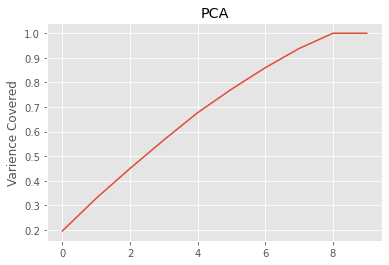

In [80]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.ylabel('Varience Covered')
plt.title('PCA')
plt.show()

# Observation:- Since 8 components will give maximum variance in the data


In [81]:
pca=PCA(n_components=8)
new_pcomp=pca.fit_transform(x_scaled)
p_c=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [82]:
p_c

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.985613,-0.444818,-1.082988,-0.047606,0.223668,-0.246621,-1.014179,0.747245
1,-1.030924,-0.565373,0.253538,-0.797176,-0.651834,-0.084157,0.816769,-0.884319
2,-0.016867,0.222362,-0.817881,1.928789,-0.205782,0.629906,-1.921021,-1.629684
3,-0.163975,1.327783,-0.219653,-0.758918,-0.016019,0.858185,-1.353582,0.982653
4,1.016536,-0.391850,-1.097207,-0.053034,0.214624,-0.238294,-1.015398,0.681323
...,...,...,...,...,...,...,...,...
588,2.733089,-0.259894,0.348980,-0.013962,-0.967572,-0.210286,1.366460,-0.677727
589,-1.111802,1.940073,-0.440322,0.088955,-1.555417,-1.199977,1.657573,-1.930333
590,-1.578386,-1.010142,-1.150845,-0.122512,0.717872,0.323335,0.061200,1.169870
591,-1.510575,-0.466831,-1.303656,-0.122469,0.700998,0.578564,0.315261,0.495575


<AxesSubplot:title={'center':'Features vs Target'}>

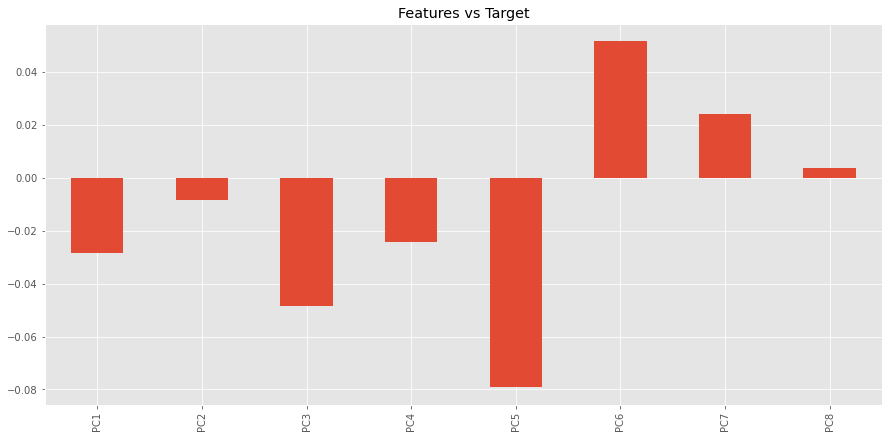

In [83]:
plt.figure(figsize=(15,7))
p_c.corrwith(y).plot(kind='bar',grid=True,title='Features vs Target')

In [84]:
## Model Building 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,plot_roc_curve

In [85]:
x_train,x_test,y_train,y_test=train_test_split(p_c,y,test_size=0.25,random_state=41)

In [86]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print('  Training Result  ')
        print('Accuracy_Score: ',accuracy_score(y_train,ypred)*100)
        
    elif train==False:
        y_pred=clf.predict(x_test)
        print('   Test Result    ')
        print('Accuracy_Score: ',accuracy_score(y_test,y_pred)*100)
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        plt.figure(figsize=(15,7))
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':10},fmt='0.2f')

In [87]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [88]:
model(lr,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  80.4054054054054


   Test Result    
Accuracy_Score:  84.56375838926175
[[ 25  23]
 [  0 101]]
              precision    recall  f1-score   support

           0       1.00      0.52      0.68        48
           1       0.81      1.00      0.90       101

    accuracy                           0.85       149
   macro avg       0.91      0.76      0.79       149
weighted avg       0.87      0.85      0.83       149



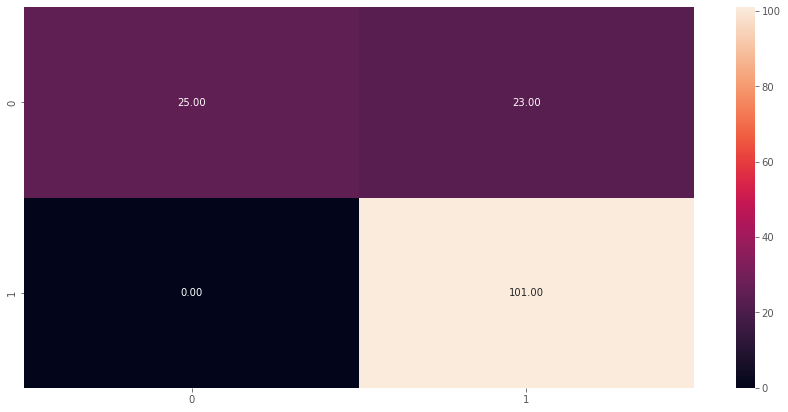

In [89]:
model(lr,x_train,x_test,y_train,y_test,train=False)

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
print('LogisticRegression',cross_val_score(lr,p_c,y,cv=5).mean())

LogisticRegression 0.8129183876940607


# KNN

In [92]:
knn=KNeighborsClassifier()

In [93]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [94]:
model(knn,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  81.08108108108108


   Test Result    
Accuracy_Score:  80.53691275167785
[[26 22]
 [ 7 94]]
              precision    recall  f1-score   support

           0       0.79      0.54      0.64        48
           1       0.81      0.93      0.87       101

    accuracy                           0.81       149
   macro avg       0.80      0.74      0.75       149
weighted avg       0.80      0.81      0.79       149



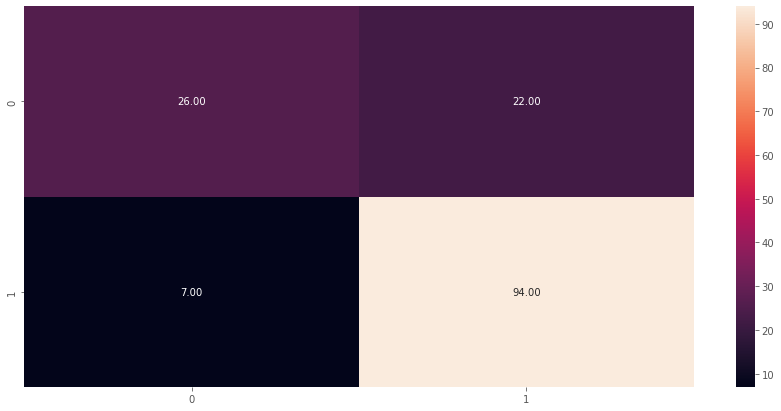

In [95]:
model(knn,x_train,x_test,y_train,y_test,train=False)

In [96]:
print('KNN',cross_val_score(knn,p_c,y,cv=5).mean())

KNN 0.7707021791767554


# SVM

In [97]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [98]:
model(svc,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  81.30630630630631


   Test Result    
Accuracy_Score:  82.5503355704698
[[26 22]
 [ 4 97]]
              precision    recall  f1-score   support

           0       0.87      0.54      0.67        48
           1       0.82      0.96      0.88       101

    accuracy                           0.83       149
   macro avg       0.84      0.75      0.77       149
weighted avg       0.83      0.83      0.81       149



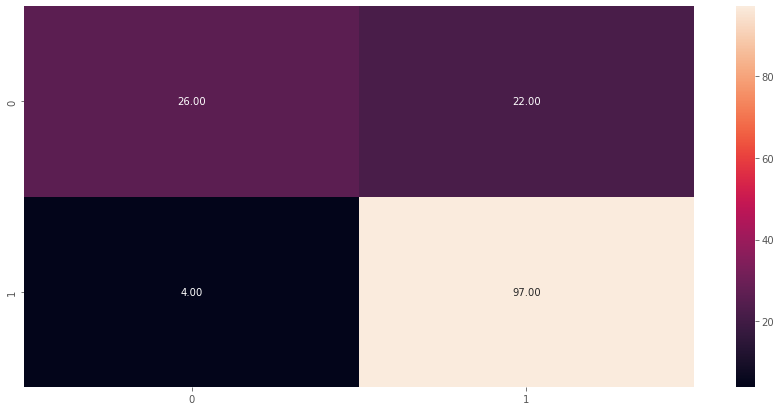

In [99]:
model(svc,x_train,x_test,y_train,y_test,train=False)

In [100]:
print('SVC',cross_val_score(svc,p_c,y,cv=5).mean())

SVC 0.8129326306793903


# DecisionTree Classifier

In [101]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [102]:
model(dt,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  99.32432432432432


   Test Result    
Accuracy_Score:  71.14093959731544
[[32 16]
 [27 74]]
              precision    recall  f1-score   support

           0       0.54      0.67      0.60        48
           1       0.82      0.73      0.77       101

    accuracy                           0.71       149
   macro avg       0.68      0.70      0.69       149
weighted avg       0.73      0.71      0.72       149



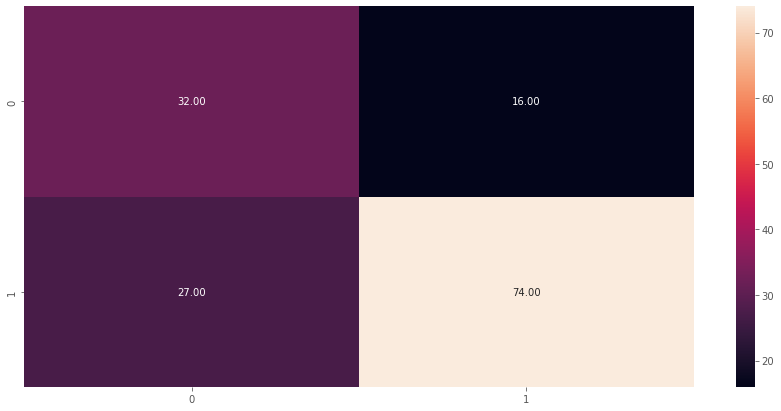

In [103]:
model(dt,x_train,x_test,y_train,y_test,train=False)

In [104]:
print('DecisionTreeClassifier',cross_val_score(dt,p_c,y,cv=5).mean())

DecisionTreeClassifier 0.6914684517874946


# RandomForestClassifier

In [105]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [106]:
model(rf,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  99.32432432432432


   Test Result    
Accuracy_Score:  76.51006711409396
[[28 20]
 [15 86]]
              precision    recall  f1-score   support

           0       0.65      0.58      0.62        48
           1       0.81      0.85      0.83       101

    accuracy                           0.77       149
   macro avg       0.73      0.72      0.72       149
weighted avg       0.76      0.77      0.76       149



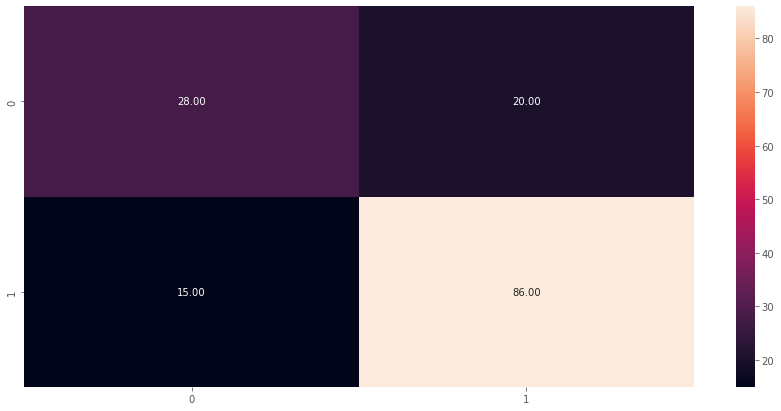

In [107]:
model(rf,x_train,x_test,y_train,y_test,train=False)

# Since Random Forest is the good model we will proceed for hyperparameter tuning

In [111]:
print('RandomForestClassifier',cross_val_score(rf,p_c,y,cv=5).mean())

RandomForestClassifier 0.7572710440108248


In [112]:
# Hyperparameter Tunnig
from sklearn.model_selection import GridSearchCV

In [113]:
params={'n_estimators':[100],
       'criterion':['gini','entropy'],
       'max_depth':[6,7,8,9],
       'min_samples_split':[4,5,6,7],
       'min_samples_leaf':[1,2,3,5]}

In [114]:
gv=GridSearchCV(rf,param_grid=params)
gv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [100]})

In [115]:
gv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [116]:
rf=RandomForestClassifier(criterion='gini',max_depth=9,min_samples_leaf=1,min_samples_split=5,n_estimators=100)

In [117]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=5)

In [118]:
model(rf,x_train,x_test,y_train,y_test,train=True)

  Training Result  
Accuracy_Score:  91.21621621621621


   Test Result    
Accuracy_Score:  77.85234899328859
[[27 21]
 [12 89]]
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        48
           1       0.81      0.88      0.84       101

    accuracy                           0.78       149
   macro avg       0.75      0.72      0.73       149
weighted avg       0.77      0.78      0.77       149



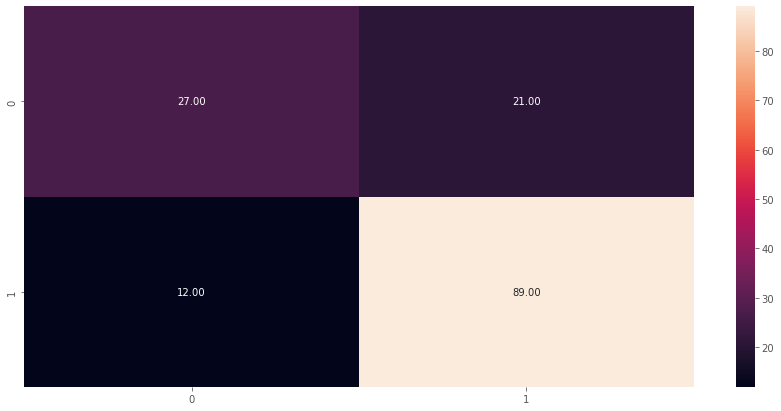

In [119]:
model(rf,x_train,x_test,y_train,y_test,train=False)

In [120]:
print('RandomForestClassifier',cross_val_score(rf,p_c,y,cv=5).mean())

RandomForestClassifier 0.7707876370887339


# Final Conclusion:-


1.Through Hyperparameter Tunning we have reduced the overfitting problem.

2.Accuracy Score for the model is 76%

3.F1 score is 77%

4.Cross_validation Score is 74%

<Figure size 1080x504 with 0 Axes>

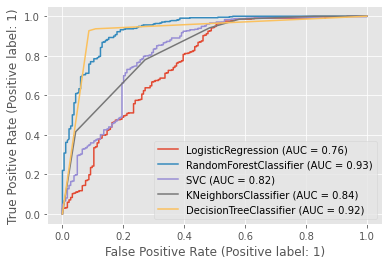

In [121]:
plt.figure(figsize=(15,7))
disp=plot_roc_curve(lr,p_c,y)
plot_roc_curve(rf,p_c,y,ax=disp.ax_)
plot_roc_curve(svc,p_c,y,ax=disp.ax_)
plot_roc_curve(knn,p_c,y,ax=disp.ax_)
plot_roc_curve(dt,p_c,y,ax=disp.ax_)

In [122]:
y_pred=rf.predict(x_test)
Report=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
Report

,Actual,Predicted
227,1,1
255,1,1
264,1,1
493,1,0
359,1,1
...,...,...
228,1,0
225,0,1
197,1,1
187,1,0


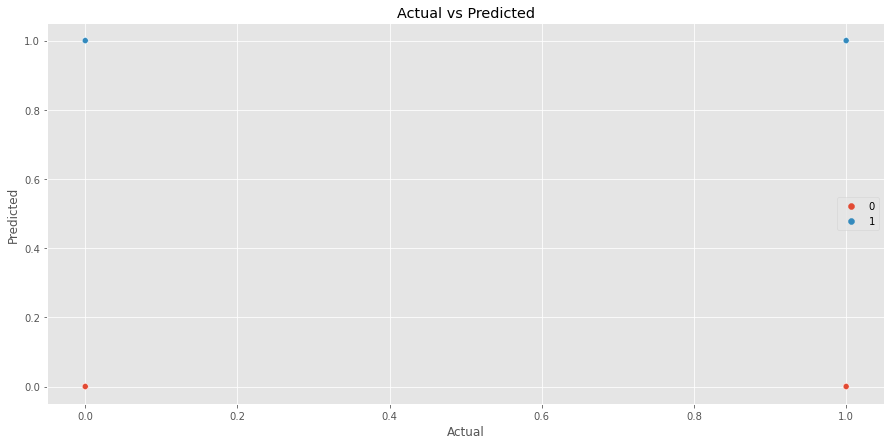

In [123]:
plt.figure(figsize=(15,7))
sns.scatterplot(y_test,y_pred,hue=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [124]:
## Saving the model
import pickle
filename='Loan_Report'
pickle.dump(rf,open(filename,'wb'))